# Healthcare Lab (Pooled Cross Sectional)

**Learning Objectives:**
  * Define and fit simple regression models
  
  * Gain exposure to healthcare related DataSets

## Context of the dataset

### 1. The dataset is consisted of records corresponding to medical events.
### 2. Each medical event is uniquely identified by `MedicalClaim`.
### 3. A given medical event might involve several medical procedures.
### 4. Each medical procedure is uniquely identified by `ClaimItem`
### 5. A given medical procedure is characterized by `PrincipalDiagnosisDesc`,`PrincipalDiagnosis`,`RevenueCodeDesc`, `RevenueCode`, `TypeFlag` and `TotalExpenses`

### 6. Each medical procedure involves: `MemberName`,`MemberID`,`County`,`HospitalName`, `HospitalType`, `StartDate`,`EndDate`


## 1. Library Import

In [28]:
!pip install linearmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.2 MB/s eta 0:00:00


In [29]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
import linearmodels as plm


In [2]:
warnings.simplefilter('ignore')

## 2. Data loading and DataFrame creation

In [3]:
HealthCareDataSet=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/HealthcareDataset_PublicRelease.csv",sep=',',parse_dates=['StartDate','EndDate','BirthDate'])

In [4]:
HealthCareDataSet.head(3)

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses
0,634363,e659f3f4,6a380a28,6f943458,c1e3436737c77899,18,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,15.148
1,634364,e659f3f4,6a380a28,6f943458,c1e3436737c77899,21,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,3.073
2,634387,e659f3f4,6a380a28,6f943458,c1e3436737c77899,10,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,LABORATORY - CLINICAL DIAGNOSTIC: HEMATOLOGY,305.0,ER,1967-05-13,123.900


In [5]:
HealthCareDataSet.describe()

,Id,ClaimItem,StartDate,EndDate,RevenueCode,BirthDate,TotalExpenses
count,52563.000000,52563.000000,52563,52563,52563.000000,52563,52563.000000
mean,685655.197953,12.023990,2020-06-21 00:12:27.902516992,2020-06-24 21:03:58.958963200,386.321995,1948-05-11 14:05:37.378003712,2735.230373
min,634363.000000,1.000000,2020-01-01 00:00:00,2020-01-01 00:00:00,24.000000,1921-01-18 00:00:00,0.000000
25%,658574.500000,5.000000,2020-03-09 00:00:00,2020-03-13 00:00:00,301.000000,1939-11-10 00:00:00,194.642000
50%,684404.000000,10.000000,2020-06-22 00:00:00,2020-06-26 00:00:00,307.000000,1947-05-12 00:00:00,675.262000
75%,712375.500000,16.000000,2020-09-25 00:00:00,2020-09-29 00:00:00,450.000000,1953-12-02 00:00:00,2309.265000
max,741736.000000,127.000000,2020-12-31 00:00:00,2020-12-31 00:00:00,942.000000,1999-08-09 00:00:00,504533.400000
std,30913.839360,10.747558,NaN,NaN,158.551733,NaN,8292.178928


In [6]:
HealthCareDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52563 entries, 0 to 52562
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Id                      52563 non-null  int64         
 1   MemberName              52563 non-null  object        
 2   MemberID                52563 non-null  object        
 3   County                  52563 non-null  object        
 4   MedicalClaim            52563 non-null  object        
 5   ClaimItem               52563 non-null  int64         
 6   HospitalName            52563 non-null  object        
 7   HospitalType            52563 non-null  object        
 8   StartDate               52563 non-null  datetime64[ns]
 9   EndDate                 52563 non-null  datetime64[ns]
 10  PrincipalDiagnosisDesc  52563 non-null  object        
 11  PrincipalDiagnosis      52563 non-null  object        
 12  RevenueCodeDesc         52561 non-null  object

In [7]:
HealthCareDataSet['AgeAtMedicalEvent']=(HealthCareDataSet['StartDate']-HealthCareDataSet['BirthDate'])

In [8]:
HealthCareDataSet['AgeAtMedicalEvent'].dt.total_seconds() / (365.25 * 24 * 60 * 60)

,AgeAtMedicalEvent
0,52.657084
1,52.657084
2,52.657084
3,52.657084
4,52.657084
...,...
52558,80.637919
52559,70.258727
52560,70.258727
52561,70.258727


In [9]:
HealthCareDataSet['AgeAtMedicalEvent']=HealthCareDataSet['AgeAtMedicalEvent'].dt.total_seconds() / (365.25 * 24 * 60 * 60)

In [10]:
HealthCareDataSet.groupby('County').count()

,Id,MemberName,MemberID,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses,AgeAtMedicalEvent
County,,,,,,,,,,,,,,,,,
02af982d,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525
217dc01f,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59
33b7d74d,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
39825de7,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165
425a37b2,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468
5597ffc0,443,443,443,443,443,443,443,443,443,443,443,443,443,443,443,443,443
6f0b5b6c,555,555,555,555,555,555,555,555,555,555,555,555,555,555,555,555,555
6f943458,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849
7a56b047,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


In [11]:
HealthCareDataSet['SecondSemester']=HealthCareDataSet['StartDate']>'2020-06-30'

In [12]:
HealthCareDataSet['SecondSemester']=HealthCareDataSet['SecondSemester'].astype(int)

In [13]:
HealthCareDataSet

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses,AgeAtMedicalEvent,SecondSemester
0,634363,e659f3f4,6a380a28,6f943458,c1e3436737c77899,18,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,15.148,52.657084,0
1,634364,e659f3f4,6a380a28,6f943458,c1e3436737c77899,21,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,3.073,52.657084,0
2,634387,e659f3f4,6a380a28,6f943458,c1e3436737c77899,10,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,LABORATORY - CLINICAL DIAGNOSTIC: HEMATOLOGY,305.0,ER,1967-05-13,123.900,52.657084,0
3,634388,e659f3f4,6a380a28,6f943458,c1e3436737c77899,20,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,7.511,52.657084,0
4,634389,e659f3f4,6a380a28,6f943458,c1e3436737c77899,19,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,8.631,52.657084,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52558,741726,ff90a52f,4ed7db9f,425a37b2,90e8ae169cbba3bd,1,a9bf1474,HOSPITAL,2020-12-02,2020-12-09,Traumatic subarachnoid he,S06.6X0A,INTERMEDIATE ICU,206.0,INP,1940-04-13,2436.000,80.637919,1
52559,741733,f90fcde2,c88e4212,425a37b2,8b6a8d2720d16e97,7,a9bf1474,HOSPITAL,2020-12-18,2020-12-22,Iron deficiency anemia se,D50.0,LABORATORY - CLINICAL DIAGNOSTIC: HEMATOLOGY,305.0,INP,1950-09-15,2075.500,70.258727,1
52560,741734,f90fcde2,c88e4212,425a37b2,8b6a8d2720d16e97,8,a9bf1474,HOSPITAL,2020-12-18,2020-12-22,Iron deficiency anemia se,D50.0,RADIOLOGY - DIAGNOSTIC: CHEST X-RAY,324.0,INP,1950-09-15,865.900,70.258727,1
52561,741735,f90fcde2,c88e4212,425a37b2,8b6a8d2720d16e97,12,a9bf1474,HOSPITAL,2020-12-18,2020-12-22,Iron deficiency anemia se,D50.0,EKG/ECG,730.0,INP,1950-09-15,665.000,70.258727,1


### 3. Cost Evolution (County Unit of Analysis, First Model)
#### We need to determine the evolution of costs accross time. To do this we fit a fixed effects model controlling for `County` and whether the medical event took place during the second semester of 2020 (`SecondSemester`).


### 3.1. Model Fit

In [65]:
HealthCareDataSetGroupedByMedicalClaim=HealthCareDataSet.groupby(['County','SecondSemester','MedicalClaim','TypeFlag']).agg({'TotalExpenses':'sum'}).reset_index()
HealthCareDataSetGroupedByMedicalClaim.rename(columns={'TotalExpenses':'TotalExpensesPerClaim'},inplace=True)

In [66]:
HealthCareDataSetGroupedByMedicalClaim['LogTotalExpensesPerClaim']=np.log(HealthCareDataSetGroupedByMedicalClaim['TotalExpensesPerClaim'])

In [67]:
## We need to set County and SecondSemester to have them considered as the


HealthCareDataSetGroupedByMedicalClaim.set_index(['County', 'SecondSemester'], drop=False,inplace=True)
HealthCareDataSetGroupedByMedicalClaim

County  SecondSemester      MedicalClaim TypeFlag  \
County   SecondSemester                                                        
02af982d 0               02af982d               0  0100acd166512fa8      INP   
         0               02af982d               0  014e756981adbe8a       ER   
         0               02af982d               0  01f7100f8a7a575a       ER   
         0               02af982d               0  0217915ce58746a2      INP   
         0               02af982d               0  0239fb736d3c6fc1      INP   
...                           ...             ...               ...      ...   
fd218584 1               fd218584               1  f6d813e25b069ea4       ER   
         1               fd218584               1  f9190d674031fe94      INP   
         1               fd218584               1  fd02e7498473245d       ER   
         1               fd218584               1  fee6cebc72f627b0       ER   
         1               fd218584               1  fff610c68bdf675f      INP   

                         TotalExpensesPerClaim  LogTotalExpensesPerClaim  
County   SecondSemester                                                   
02af982d 0                           34893.131                 10.460045  
         0                           31548.433                 10.359279  
         0                           30661.225                 10.330754  
         0                           23430.722                 10.061803  
         0                           20221.579                  9.914506  
...                                        ...                       ...  
fd218584 1                            3499.167                  8.160280  
         1                           34240.122                 10.441153  
         1                            2145.185                  7.670981  
         1                           20669.208                  9.936400  
         1                           54658.520                 10.908860  

[3361 rows x 6 columns]

In [72]:
 #We impose a simple, linear, model:
# We specify TotalExpensesPerClaim as the response variable (a.k.a dependent variable).
reg = plm.PanelOLS.from_formula(formula='LogTotalExpensesPerClaim ~ TypeFlag+TypeFlag*SecondSemester+EntityEffects', data=HealthCareDataSetGroupedByMedicalClaim,drop_absorbed=True)


In [73]:
results=reg.fit()

In [74]:
results.summary

Dep. Variable:,LogTotalExpensesPerClaim,R-squared:,0.5338
Estimator:,PanelOLS,R-squared (Between):,0.3752
No. Observations:,3361,R-squared (Within):,0.5338
Date:,"Tue, Aug 13 2024",R-squared (Overall):,0.5272
Time:,09:25:34,Log-likelihood,-4592.9
Cov. Estimator:,Unadjusted,,
,,F-statistic:,1274.3
Entities:,19,P-value,0.0000
Avg Obs:,176.89,Distribution:,"F(3,3339)"
Min Obs:,1.0000,,
Max Obs:,1566.0,F-statistic (robust):,8.678e+04


#### 3.2. Model Interpretation

#### All the p-values are statistically significant.

#### The model explains up to 53.3% of the variance (R-squared=0.53)
#### The model is statistically significant (F-test: 1274.3, p-value: 0.0000)


#### Based on the above we conclude that:

* ER-related medical events increase costs by 8.92%
* INP-related medical events increase costs by 10.89%
* Costs during the second semester decreased by 0.1%
* Costs for INP-related medical events decreased by 0.18% during the second semester.



<Axes: xlabel='SecondSemester', ylabel='LogTotalExpensesPerClaim'>

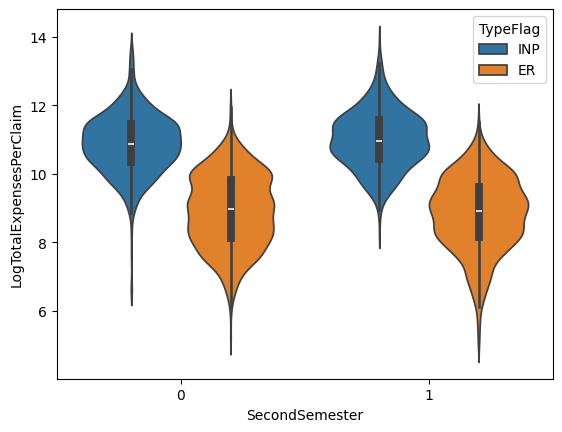

In [84]:
sns.violinplot(data=HealthCareDataSetGroupedByMedicalClaim, hue="TypeFlag", y="LogTotalExpensesPerClaim", x="SecondSemester")